# Pheatmap Across All Assays

## Purpose:

* Install `pheatmap` Package 
* Read Normalized Matrices per Assay 
* Assign Sample Condition 
* Create Color Schema and Annotation
* Plot with `pheatmap`

## Install Necessary Packages

In [1]:
# install.packages("pheatmap", "/home/yraghav/notebook_container/R")

In [2]:
.libPaths(c(.libPaths(), "/home/yraghav/notebook_container/R"))
.libPaths()

[1] "/opt/conda/lib/R/library"           "/home/yraghav/notebook_container/R"

In [3]:
library("pheatmap")
library("RColorBrewer")
library("data.table")

## Read Matrix 

In [4]:
ATAC_matrix = data.table::fread(
    "/home/yraghav/MIT-Fraenkel-Lab/Projects/CHDI_NeuroLINCS/advanced_analysis/Ordinal_Regression/1_feature_generation_and_pre_processing/raw_counts_processing/output/ATAC.normalized.matrix",
    header=TRUE, 
    sep="\t",
    check.names=FALSE
    )

In [5]:
ATAC_matrix = as.data.frame(t(ATAC_matrix))

In [6]:
colnames(ATAC_matrix) = ATAC_matrix[1,]
ATAC_matrix = ATAC_matrix[-1,]

In [7]:
# save original row names since 'sapply' removes row names 
original_row_names= rownames(ATAC_matrix)
original_row_names

[1] "'201209Fra_D20-6795_1.trim.nodup.no_chrM_MT'"                  
 [2] "'201209FraA_D20-6801_1.trim.nodup.no_chrM_MT'"                 
 [3] "'72-20_rep3_210203Fra_D21-1102_1.trim.merged.nodup.no_chrM_MT'"
 [4] "'201209FraB_D20-7056_1.trim.nodup.no_chrM_MT'"                 
 [5] "'56-22_rep3_210203Fra_D21-1101_1.trim.merged.nodup.no_chrM_MT'"
 [6] "'201209FraB_D20-6811_1.trim.nodup.no_chrM_MT'"                 
 [7] "'201209FraA_D20-6802_1.trim.nodup.no_chrM_MT'"                 
 [8] "'201209FraB_D20-6808_1.trim.nodup.no_chrM_MT'"                 
 [9] "'201209FraA_D20-6803_1.trim.nodup.no_chrM_MT'"                 
[10] "'201209FraB_D20-6809_1.trim.nodup.no_chrM_MT'"                 
[11] "'22-20_rep3_210203Fra_D21-1100_1.trim.merged.nodup.no_chrM_MT'"
[12] "'201209FraA_D20-6804_1.trim.nodup.no_chrM_MT'"

In [8]:
# convert all columns to type 'double'
ATAC_matrix = as.data.frame(sapply(ATAC_matrix, as.double))
# add row names again 
rownames(ATAC_matrix) = original_row_names

In [9]:
ATAC_matrix

,chr1:56120-56475,chr1:66798-67060,chr1:180739-181148,chr1:629082-630053,chr1:630221-630503,chr1:630717-631417,chr1:631809-633007,chr1:633382-633554,chr1:633880-634642,chr1:634684-634906,⋯,chrY:7287610-7288291,chrY:9141824-9142031,chrY:11329794-11330046,chrY:11789193-11789460,chrY:12438835-12439262,chrY:12446469-12446811,chrY:12448053-12448296,chrY:12450934-12451269,chrY:24270746-24270988,chrY:25399151-25399399
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
'201209Fra_D20-6795_1.trim.nodup.no_chrM_MT',10.452050,17.42009,25.25912,56043.90,10356.240,35161.57,59077.61,6606.567,33646.89,5478.617,⋯,42.67921,264.7853,20.03310,12.194060,27.87214,20.033100,20.90410,15.67808,10.452050,13.936070
'201209FraA_D20-6801_1.trim.nodup.no_chrM_MT',13.398290,23.14251,21.92448,97655.30,18147.380,63127.89,105574.90,11098.660,59450.67,9710.110,⋯,52.37515,526.1876,17.05238,38.976860,85.26188,41.412910,29.23264,51.15713,30.450670,9.744214
'72-20_rep3_210203Fra_D21-1102_1.trim.merged.nodup.no_chrM_MT',57.940479,23.70292,51.35633,50903.34,13540.953,42230.71,66099.55,7054.253,42141.16,6661.838,⋯,100.07901,808.5331,47.40585,39.504872,79.00974,92.178035,23.70292,118.51462,51.356334,57.940479
'201209FraB_D20-7056_1.trim.nodup.no_chrM_MT',11.367610,11.36761,17.48863,63245.89,12226.300,39937.04,68470.62,7701.994,39061.73,6211.962,⋯,33.22840,234.3477,14.86534,25.358520,38.47499,14.865340,20.98636,20.11193,10.493180,6.121021
'56-22_rep3_210203Fra_D21-1101_1.trim.merged.nodup.no_chrM_MT',13.992921,26.33962,25.51650,55594.70,10502.922,33210.96,59720.96,6405.465,33115.48,5430.077,⋯,35.39386,255.1650,13.16981,8.231130,41.97876,9.054243,15.63915,25.51650,9.054243,7.408017
'201209FraB_D20-6811_1.trim.nodup.no_chrM_MT',24.659700,18.74137,19.72776,73510.55,13831.130,47423.55,81045.57,8733.478,45407.38,7629.710,⋯,53.26494,426.1196,32.55080,7.891103,48.33300,23.673310,27.61886,26.63247,14.795820,12.823040
'201209FraA_D20-6802_1.trim.nodup.no_chrM_MT',16.166282,18.47575,30.02310,91517.32,17314.088,59259.82,99881.06,10506.928,55194.00,9101.617,⋯,75.05774,551.9630,16.16628,24.249423,53.11778,43.879908,24.24942,27.71363,31.177829,36.951501
'201209FraB_D20-6808_1.trim.nodup.no_chrM_MT',10.253255,16.40521,21.53184,73205.17,14051.061,46893.26,79549.88,8790.116,44839.54,7341.331,⋯,37.93704,319.9016,17.43053,14.354558,46.13965,21.531836,18.45586,32.81042,11.278581,14.354558
'201209FraA_D20-6803_1.trim.nodup.no_chrM_MT',8.558979,13.22751,14.78369,44541.71,8583.878,28669.47,48145.04,5037.348,27135.85,4663.087,⋯,28.78929,259.8817,14.78369,12.449424,31.12356,22.564581,14.00560,26.45503,7.780890,7.002801


In [7]:
# rownames(ATAC_matrix) = ATAC_matrix[,1]
# ATAC_matrix = ATAC_matrix[,-1]

# original_row_names = rownames(ATAC_matrix)


## Assign Condition

In [10]:
############
# ATAC-Seq #
############

condition = c("Control", "Control", "72/20", "56/22", "56/22", "72/20", "Control", "Control", "56/22", "Control", "Control", "72/20")
condition = factor(condition, order=TRUE, levels = c("Control", "56/22", "72/20"))

condition


############
# ChIP-Seq #
############

# condition = list()

#     for (sample in original_row_names){
#         q_length= strsplit(sample, split="_")[[1]][1]

#         if (grepl("20-20",q_length)==TRUE | grepl("22-20", q_length)==TRUE){
#             condition = c(condition, "Control")
#         }
#         else if (grepl("56-22",q_length)==TRUE){
#             condition = c(condition, "56/22")
#         }
#         else if (grepl("72-20", q_length)==TRUE){
#             condition = c(condition, "72/20")
#         }
#     }


# condition = factor(condition, order=TRUE, levels = c("Control", "56/22", "72/20"))

[1] Control Control 72/20   56/22   56/22   72/20   Control Control 56/22  
[10] Control Control 72/20  
Levels: Control < 56/22 < 72/20

In [11]:
ATAC_matrix = cbind(condition, ATAC_matrix)
ATAC_matrix

,condition,chr1:56120-56475,chr1:66798-67060,chr1:180739-181148,chr1:629082-630053,chr1:630221-630503,chr1:630717-631417,chr1:631809-633007,chr1:633382-633554,chr1:633880-634642,⋯,chrY:7287610-7288291,chrY:9141824-9142031,chrY:11329794-11330046,chrY:11789193-11789460,chrY:12438835-12439262,chrY:12446469-12446811,chrY:12448053-12448296,chrY:12450934-12451269,chrY:24270746-24270988,chrY:25399151-25399399
,<ord>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
'201209Fra_D20-6795_1.trim.nodup.no_chrM_MT',Control,10.452050,17.42009,25.25912,56043.90,10356.240,35161.57,59077.61,6606.567,33646.89,⋯,42.67921,264.7853,20.03310,12.194060,27.87214,20.033100,20.90410,15.67808,10.452050,13.936070
'201209FraA_D20-6801_1.trim.nodup.no_chrM_MT',Control,13.398290,23.14251,21.92448,97655.30,18147.380,63127.89,105574.90,11098.660,59450.67,⋯,52.37515,526.1876,17.05238,38.976860,85.26188,41.412910,29.23264,51.15713,30.450670,9.744214
'72-20_rep3_210203Fra_D21-1102_1.trim.merged.nodup.no_chrM_MT',72/20,57.940479,23.70292,51.35633,50903.34,13540.953,42230.71,66099.55,7054.253,42141.16,⋯,100.07901,808.5331,47.40585,39.504872,79.00974,92.178035,23.70292,118.51462,51.356334,57.940479
'201209FraB_D20-7056_1.trim.nodup.no_chrM_MT',56/22,11.367610,11.36761,17.48863,63245.89,12226.300,39937.04,68470.62,7701.994,39061.73,⋯,33.22840,234.3477,14.86534,25.358520,38.47499,14.865340,20.98636,20.11193,10.493180,6.121021
'56-22_rep3_210203Fra_D21-1101_1.trim.merged.nodup.no_chrM_MT',56/22,13.992921,26.33962,25.51650,55594.70,10502.922,33210.96,59720.96,6405.465,33115.48,⋯,35.39386,255.1650,13.16981,8.231130,41.97876,9.054243,15.63915,25.51650,9.054243,7.408017
'201209FraB_D20-6811_1.trim.nodup.no_chrM_MT',72/20,24.659700,18.74137,19.72776,73510.55,13831.130,47423.55,81045.57,8733.478,45407.38,⋯,53.26494,426.1196,32.55080,7.891103,48.33300,23.673310,27.61886,26.63247,14.795820,12.823040
'201209FraA_D20-6802_1.trim.nodup.no_chrM_MT',Control,16.166282,18.47575,30.02310,91517.32,17314.088,59259.82,99881.06,10506.928,55194.00,⋯,75.05774,551.9630,16.16628,24.249423,53.11778,43.879908,24.24942,27.71363,31.177829,36.951501
'201209FraB_D20-6808_1.trim.nodup.no_chrM_MT',Control,10.253255,16.40521,21.53184,73205.17,14051.061,46893.26,79549.88,8790.116,44839.54,⋯,37.93704,319.9016,17.43053,14.354558,46.13965,21.531836,18.45586,32.81042,11.278581,14.354558
'201209FraA_D20-6803_1.trim.nodup.no_chrM_MT',56/22,8.558979,13.22751,14.78369,44541.71,8583.878,28669.47,48145.04,5037.348,27135.85,⋯,28.78929,259.8817,14.78369,12.449424,31.12356,22.564581,14.00560,26.45503,7.780890,7.002801


## Sort by Condition

In [12]:
ATAC_matrix = ATAC_matrix[order(ATAC_matrix$condition),]
ATAC_matrix

,condition,chr1:56120-56475,chr1:66798-67060,chr1:180739-181148,chr1:629082-630053,chr1:630221-630503,chr1:630717-631417,chr1:631809-633007,chr1:633382-633554,chr1:633880-634642,⋯,chrY:7287610-7288291,chrY:9141824-9142031,chrY:11329794-11330046,chrY:11789193-11789460,chrY:12438835-12439262,chrY:12446469-12446811,chrY:12448053-12448296,chrY:12450934-12451269,chrY:24270746-24270988,chrY:25399151-25399399
,<ord>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
'201209Fra_D20-6795_1.trim.nodup.no_chrM_MT',Control,10.452050,17.42009,25.25912,56043.90,10356.240,35161.57,59077.61,6606.567,33646.89,⋯,42.67921,264.7853,20.03310,12.194060,27.87214,20.033100,20.90410,15.67808,10.452050,13.936070
'201209FraA_D20-6801_1.trim.nodup.no_chrM_MT',Control,13.398290,23.14251,21.92448,97655.30,18147.380,63127.89,105574.90,11098.660,59450.67,⋯,52.37515,526.1876,17.05238,38.976860,85.26188,41.412910,29.23264,51.15713,30.450670,9.744214
'201209FraA_D20-6802_1.trim.nodup.no_chrM_MT',Control,16.166282,18.47575,30.02310,91517.32,17314.088,59259.82,99881.06,10506.928,55194.00,⋯,75.05774,551.9630,16.16628,24.249423,53.11778,43.879908,24.24942,27.71363,31.177829,36.951501
'201209FraB_D20-6808_1.trim.nodup.no_chrM_MT',Control,10.253255,16.40521,21.53184,73205.17,14051.061,46893.26,79549.88,8790.116,44839.54,⋯,37.93704,319.9016,17.43053,14.354558,46.13965,21.531836,18.45586,32.81042,11.278581,14.354558
'201209FraB_D20-6809_1.trim.nodup.no_chrM_MT',Control,14.861996,16.98514,16.98514,68242.04,12900.212,43752.65,74445.86,8152.866,41918.26,⋯,66.87898,301.4862,19.10828,23.354565,39.27813,42.462845,14.86200,39.27813,19.108280,12.738854
'22-20_rep3_210203Fra_D21-1100_1.trim.merged.nodup.no_chrM_MT',Control,12.163170,24.32635,28.06886,82486.90,15044.910,50038.36,90185.25,9475.112,50287.24,⋯,58.00898,370.5090,19.64820,9.356287,43.03892,5.613772,25.26198,36.48952,8.420659,13.098800
'201209FraB_D20-7056_1.trim.nodup.no_chrM_MT',56/22,11.367610,11.36761,17.48863,63245.89,12226.300,39937.04,68470.62,7701.994,39061.73,⋯,33.22840,234.3477,14.86534,25.358520,38.47499,14.865340,20.98636,20.11193,10.493180,6.121021
'56-22_rep3_210203Fra_D21-1101_1.trim.merged.nodup.no_chrM_MT',56/22,13.992921,26.33962,25.51650,55594.70,10502.922,33210.96,59720.96,6405.465,33115.48,⋯,35.39386,255.1650,13.16981,8.231130,41.97876,9.054243,15.63915,25.51650,9.054243,7.408017
'201209FraA_D20-6803_1.trim.nodup.no_chrM_MT',56/22,8.558979,13.22751,14.78369,44541.71,8583.878,28669.47,48145.04,5037.348,27135.85,⋯,28.78929,259.8817,14.78369,12.449424,31.12356,22.564581,14.00560,26.45503,7.780890,7.002801


## Colors

In [13]:
cols = colorRampPalette(c("blue", "white", "red"))(50)

qual_col_pals<-brewer.pal.info[brewer.pal.info$category == 'qual'&
                                 brewer.pal.info$colorblind==TRUE,]
col_vector<-unlist(mapply(brewer.pal, qual_col_pals$maxcolors, rownames(qual_col_pals)))

anno.cols<-list(
  `repeat length`=c(
    "Control"=col_vector[1],"56/22"=col_vector[2],"72/20"=col_vector[3]
  ))

## Create Annotation Data Frame

In [14]:
row_ann = data.frame(ATAC_matrix$condition)
row_ann

ATAC_matrix.condition
<ord>
Control
Control
Control
Control
Control
Control
56/22
56/22
56/22


In [15]:
rownames(row_ann) = rownames(ATAC_matrix)
colnames(row_ann) = c("Repeat Length")

In [16]:
row_ann

,Repeat Length
,<ord>
'201209Fra_D20-6795_1.trim.nodup.no_chrM_MT',Control
'201209FraA_D20-6801_1.trim.nodup.no_chrM_MT',Control
'201209FraA_D20-6802_1.trim.nodup.no_chrM_MT',Control
'201209FraB_D20-6808_1.trim.nodup.no_chrM_MT',Control
'201209FraB_D20-6809_1.trim.nodup.no_chrM_MT',Control
'22-20_rep3_210203Fra_D21-1100_1.trim.merged.nodup.no_chrM_MT',Control
'201209FraB_D20-7056_1.trim.nodup.no_chrM_MT',56/22
'56-22_rep3_210203Fra_D21-1101_1.trim.merged.nodup.no_chrM_MT',56/22
'201209FraA_D20-6803_1.trim.nodup.no_chrM_MT',56/22


## Plot with "pheatmap"

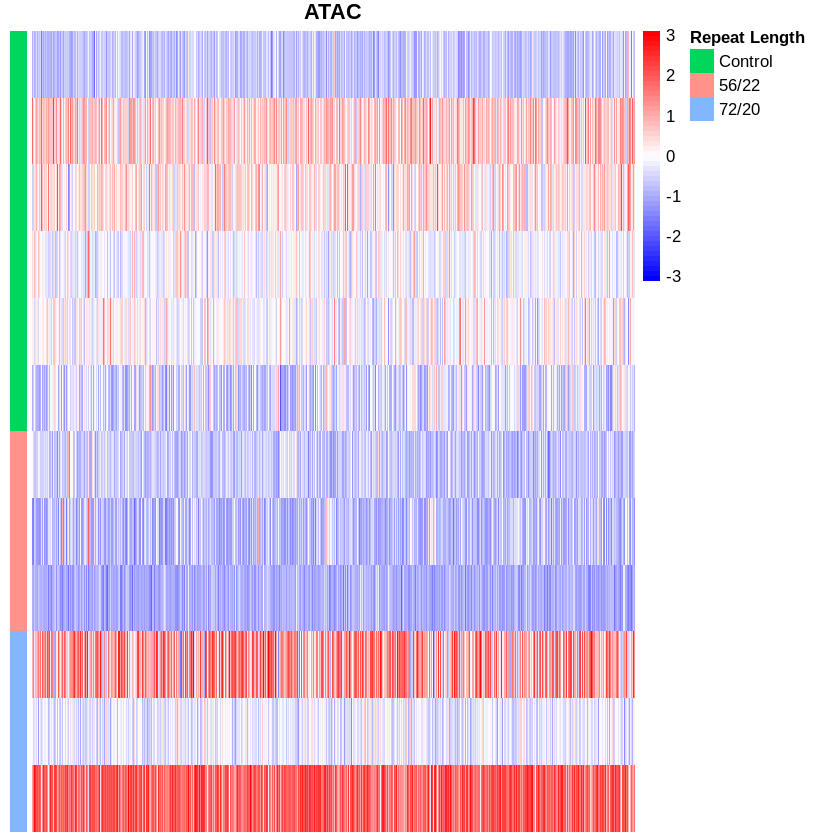

In [19]:
pheatmap_ATAC= pheatmap(ATAC_matrix[,-1], 
         cluster_rows=FALSE, 
         cluster_cols=FALSE, 
         scale="column", 
         color = cols, 
         annotation_colors=anno.cols, 
         legend = TRUE, 
         annotation_legend=TRUE, 
         show_rownames=FALSE, 
         show_colnames=FALSE,
         annotation_row = row_ann, 
         annotation_names_row = FALSE, 
         main = "ATAC")

In [ ]:
save_pheatmap_png <- function(x, filename, width=1000, height=1000, res = 150) {
  png(filename, width = width, height = height, res = res)
  grid::grid.newpage()
  grid::grid.draw(x$gtable)
  dev.off()
}

In [ ]:
save_pheatmap_png(
    pheatmap_ATAC,
    "/home/yraghav/MIT-Fraenkel-Lab/Projects/CHDI_NeuroLINCS/advanced_analysis/Ordinal_Regression/5_feature_heatmaps/output/ATAC.png",
    width = 2000, 
    height = 2000, 
    res = 300)